# Useful Functions

In [1]:
import os
def ConnectToDataFolder(FolderPath):
  print("=" * 80, "- Begin: ConnectToDataFolder")

  if (os.path.isdir(FolderPath)):
    os.chdir(FolderPath)
    print("List of Data in the Folder :")
    display(os.listdir())
  else:
    print(f"{FolderPath} is not correct, please check the folder again")

  print("=" * 80, "- Finish: ConnectToDataFolder")

In [2]:
def GetSubFiles(dir, ExtensionList = []):
    print("=" * 80, "- Begin: GetSubFiles")

    "Get a list of immediate subfiles"
    all_names = next(os.walk(dir))[2]
    subfile_names = []
    if(len(ExtensionList) > 0):
      for filename in all_names:
        fname, fextension = os.path.splitext(filename)
        if any(ext in fextension for ext in ExtensionList):
          subfile_names.append(dir + "/" + filename)
    else:
      subfile_names = [dir + "/" + x for x in all_names]

    print(f"There are {len(subfile_names)} files are found")
    subfile_names.sort()
    print("Here is some samples :")
    [print(x) for x in all_names[0: min(len(subfile_names), 5)]]

    print("=" * 80, "- End: GetSubFiles")
    return all_names

In [3]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

def ShowImage(ImageList, nRows = 1, nCols = 2, ImageTitleList = []):
    gs = gridspec.GridSpec(nRows, nCols)
    plt.figure(figsize=(20,20))
    for i in range(len(ImageList)):
        ax = plt.subplot(gs[i])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        if(len(ImageTitleList)  > 0):
          plt.title("Image " + str(ImageTitleList[i]))
        else:
          plt.title("Image " + str(i))

        plt.axis('off')

    plt.show()

In [4]:
import random
from pylab import imread

def ShowRandomImage(DatasetFiles, nRows = 1, nCols = 5, seedNo = 10):
  print("=" * 80, "- Begin: ShowRandomImage")

  nFile = nRows * nCols

  random.seed(seedNo)
  FileNameList = random.sample(DatasetFiles, nFile)
  ImageList = []
  for filepath in FileNameList:
    image_RGB = imread(filepath)
    ImageList.append(image_RGB)

  ShowImage(ImageList, nRows, nCols, FileNameList)

  print("=" * 80, "- Finish: ShowRandomImage")
  return FileNameList, ImageList

In [5]:
from skimage.transform import rescale, resize
import cv2

def ResizeImage(image, wresize = 0, hresize = 0):
  OrigWidth, OrigHeight = float(image.shape[1]), float(image.shape[0])

  if((wresize == 0) & (hresize == 0)):
      return image
  if(wresize == 0):
      wresize = int((OrigWidth * hresize)/OrigHeight)
  if(hresize == 0):
      hresize = int((OrigHeight * wresize)/OrigWidth)
  resize_image = cv2.resize(image, (wresize, hresize), interpolation = cv2.INTER_NEAREST)
  return resize_image

In [6]:
def ConvertColorSpaces(image, ColorSpace = "GRAY", display = 1):
  ImageTitleList = ["RGB", ColorSpace]

  if(ColorSpace.upper() == "HSV"):
    image_convert = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ChannelList = ["Chrominance Hue" , "Chrominance Saturation", "Luminance Value"]
  elif(ColorSpace.upper() == "YCRCB"):
    image_convert = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
    ChannelList = ["Chrominance Red" , "Chrominance Blue", "Luminance Y"]
  elif(ColorSpace.upper() == "LAB"):
    image_convert = cv2.cvtColor(image, cv2.COLOR_RGB2YCR_CB)
    ChannelList = ["Chrominance a(Green To Red)" , "Chrominance b(Blue To Yellow)", "Luminance L"]
  else:
    image_convert = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  if(display):
    if(len(image_convert.shape) == 3):
      ShowImage([image, image_convert, image_convert[:,:,0], image_convert[:,:,1], image_convert[:,:,2]], 1, 5,
                ImageTitleList + ChannelList)
    else:
      ShowImage([image, image_convert], 1, 5, ImageTitleList)

  return image_convert

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def ShowHistogram(image, Title = "Color Histogram", ChannelList = ["Channel 1", "Channel 2", "Channel 3"]):
  fig, ax = plt.subplots(figsize=(20, 10))

  if(len(image.shape) == 3):
    color = ('r', 'g', 'b')
    for channel,col in enumerate(color):
        histr = cv2.calcHist([image],[channel],None,[256],[0,256])
        ax.plot(histr,color = col, label = ChannelList[channel])

    plt.title(Title)
    plt.legend()
  else:
    histr = cv2.calcHist([image],[0],None,[256],[0,256])
    plt.plot(histr,color = "gray", label = "Gray")
    plt.title("Gray Histogram")
    plt.legend()

  # Set axis ranges; by default this will put major ticks every 25.
  ax.set_xlim(0, 255)

  # Change major ticks to show every 20.
  ax.xaxis.set_major_locator(MultipleLocator(20))

  # Change minor ticks to show every 5. (20/4 = 5)
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))

  # Turn grid on for both major and minor ticks and style minor slightly
  # differently.
  ax.grid(which='major', color='#CCCCCC', linestyle='--')
  ax.grid(which='minor', color='#CCCCCC', linestyle=':')
  plt.show()

In [8]:
import numpy as np

def SegmentByThresh(image, channel, segment_range = [], display = 1):
  if(len(segment_range) == 0):
    thresh, image_mask = cv2.threshold(channel,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    print(f"Otsu Threshold : {thresh}")
  else:
    image_mask = ((channel > segment_range[0]) & (channel < segment_range[1]))

  image_segment = cv2.bitwise_and(image, image, mask = image_mask.astype(np.uint8))

  ImageTitleList = ["Color Image", "Segmented Channel", "Segmented Mask", "Segmented Color Image"]
  if(display):
    ShowImage([image, channel, image_mask, image_segment], 1, 5, ImageTitleList)

  image_mask = image_mask.astype(bool)
  return image_mask

In [9]:
import skimage
from skimage import measure

def GetLargestBinaryArea(image, image_mask, display = 1):
  labels_mask = measure.label(image_mask)
  regions = measure.regionprops(labels_mask)
  regions.sort(key=lambda x: x.area, reverse=True)
  if len(regions) > 1:
      for rg in regions[1:]:
          labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0
  labels_mask[labels_mask!=0] = 1
  image_mask = labels_mask

  image_segment = cv2.bitwise_and(image, image, mask = image_mask.astype(np.uint8))
  ImageTitleList = ["Color Image", "Segmented Mask", "Segmented Color Image"]

  if(display):
    ShowImage([image, image_mask, image_segment], 1, 5, ImageTitleList)

  return image_mask

In [10]:
from skimage.measure import label, regionprops
from skimage.segmentation import mark_boundaries

def LabelObjectByMask(image_input, image_mask, type = "BBox", color = (0,255,0)):
    image_output = image_input.copy()

    Marker_Size = int(AnImage.shape[0] * 0.1)
    Marker_Thick = int(AnImage.shape[0] * 0.01)
    BBoxThick = int(AnImage.shape[0] * 0.01)
    ContourThick = int(AnImage.shape[0] * 0.01)

    label_img = label(image_mask)
    regions = regionprops(label_img)
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        left_top = (minc, minr)
        right_bottom = (maxc, maxr)
        at_row, at_col = props.centroid

        if(type == "BBox"):
          cv2.rectangle(image_output,left_top, right_bottom, color ,BBoxThick)

        if(type == "Boundary"):
          contours, heirarchy = cv2.findContours(image_mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
          cv2.drawContours(image_output, contours, -1, color, ContourThick)
          cv2.drawMarker(image_output, (int(at_col), int(at_row)),color, markerType=cv2.MARKER_STAR,
                           markerSize= Marker_Size, thickness= Marker_Thick, line_type=cv2.LINE_AA)

        if(type == "Fill"):
          image_output[image_mask > 0] = color

    return image_output

In [11]:
def IntensityTransformation(image, gamma = 0.3, display = 1):
  image_gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
  ShowImage([image, image_gamma_corrected], 1, 5, ["Original Image", f"Gamma = {gamma}"])
  if(display):
    GammaImageList = []
    TitleList = []

    for g in [0.3, 0.5, 0.9,  1.2, 2.2]:
      # Apply gamma correction.
      gamma_corrected = np.array(255*(image / 255) ** g, dtype = 'uint8')
      GammaImageList.append(gamma_corrected)
      TitleList.append(f"Gamma = {g}")

    ShowImage(GammaImageList, 1, 5, TitleList)
  return image_gamma_corrected

In [12]:
from skimage.morphology import (erosion, dilation, opening, closing, white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from scipy import ndimage

# Morphology
def Morphology(image, image_mask, morType = "erosion", size = 3, display = 1):
  image_mask = image_mask.astype(np.uint8)
  kernel = disk(abs(size))

  if(morType == "erosion"):
    result = erosion(image_mask, kernel)
  if(morType == "dilation"):
    result = dilation(image_mask, kernel)
  if(morType == "opening"):
    result = opening(image_mask, kernel)
  if(morType == "closing"):
    result = closing(image_mask, kernel)
  if(morType == "gradient"):
    result = cv2.morphologyEx(image_mask, cv2.MORPH_GRADIENT, kernel)
  if(morType == "tophat"):
    result = white_tophat(image_mask, kernel)
  if(morType == "blackhat"):
    result = black_tophat(image_mask, kernel)
  if(morType == "fillhole"):
    result = ndimage.binary_fill_holes(image_mask).astype(int)
  if(morType == "skeleton"):
    result = skeletonize(image_mask == 1)
  if(morType == "convexhull"):
    result = convex_hull_image(image_mask == 1)

  if(display):
    image_mask_color = cv2.bitwise_and(image, image, mask = result.astype(np.uint8))

    im_erosion = erosion(image_mask, kernel)
    im_dilation = dilation(image_mask, kernel)
    im_opening = opening(image_mask, kernel)
    im_closing = closing(image_mask, kernel)
    im_gradient = cv2.morphologyEx(image_mask, cv2.MORPH_GRADIENT, kernel)
    im_tophat = white_tophat(image_mask, kernel)
    im_blackhat = black_tophat(image_mask, kernel)
    im_fillhole = ndimage.binary_fill_holes(image_mask).astype(int)
    im_skeleton = skeletonize(image_mask == 1)
    im_convexhull = convex_hull_image(image_mask == 1)

    ShowImage([image, result, image_mask_color], 1, 5, ImageTitleList= ["Color Image", "Mask", "Segment By Mask"])
    ShowImage([im_erosion, im_dilation, im_opening, im_closing, im_gradient], 1, 5,
              ImageTitleList= ["Erosion", "Dilation", "Opening", "Closing", "Gradient"])
    ShowImage([im_tophat, im_blackhat, im_fillhole, im_skeleton, im_convexhull], 1, 5,
              ImageTitleList= ["Tophat", "BlackHat", "FillHole", "Skeleton", "Convexhull"])

  result = result.astype(bool)
  return result

In [13]:
import numpy as np
def ConcatImage(ImageList, CombineType = "h", display = 1):
  if(CombineType == "h"):
    result = np.concatenate(ImageList, axis=1)
  else:
    result = np.concatenate(ImageList, axis=0)

  if(display):
    ShowImage([result], 1, 1)

  result = np.uint8(result)
  return result

In [14]:
from pathlib import Path

def GenerateOutput(image, image_mask, FilePath = "", SaveFolderPath = ""):
  image_output_rgbmask = cv2.merge([image_mask*255, image_mask*255, image_mask*255])
  image_output_fill = LabelObjectByMask(image, image_mask, type = "Fill", color = (255,0,0))
  image_output_bbox = LabelObjectByMask(image, image_mask, type = "BBox", color = (255,0,0))
  image_output_boundary = LabelObjectByMask(image, image_mask, type = "Boundary", color = (255,0,0))

  DemoImage1 = ConcatImage([image_output_rgbmask, image_output_fill], display= 0)
  DemoImage2 = ConcatImage([image_output_bbox, image_output_boundary], display= 0)
  DemoImage = ConcatImage([DemoImage1, DemoImage2], CombineType = "v", display= 0)

  if(len(FolderPath) > 0):
    filename = Path(FilePath).stem
    print(f"Already Save Results to Folder {SaveFolderPath}")

    print(f'{SaveFolderPath}/{filename}_rgbmask.jpg')
    cv2.imwrite(f'{SaveFolderPath}/{filename}_mask.jpg', image_output_rgbmask)

    print(f'{SaveFolderPath}/{filename}_demo.jpg')
    cv2.imwrite(f'{SaveFolderPath}/{filename}_demo.jpg', cv2.cvtColor(DemoImage, cv2.COLOR_RGB2BGR))

  return image_output_rgbmask, image_output_fill, image_output_bbox, image_output_boundary, DemoImage

In [15]:
def doCoconutMaskSegment(AnImage, image_mask, display = 1):
  MaskList = []
  MaskList.append(image_mask)
  image_mask_adjust = Morphology(AnImage, image_mask, morType = "fillhole", size = 8, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = Morphology(AnImage, image_mask_adjust, morType = "erosion", size = 8, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = GetLargestBinaryArea(AnImage, image_mask_adjust, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = Morphology(AnImage, image_mask_adjust, morType = "dilation", size = 10, display = 0)
  MaskList.append(image_mask_adjust)

  if(display):
    ShowImage(MaskList, 1, 5)

  return image_mask_adjust

In [16]:
def doCoconutMaskSegment2(AnImage, image_mask, display = 1):
  MaskList = []
  MaskList.append(image_mask)
  image_mask_adjust = Morphology(AnImage, image_mask, morType = "fillhole", size = 8, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = Morphology(AnImage, image_mask_adjust, morType = "erosion", size = 50, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = GetLargestBinaryArea(AnImage, image_mask_adjust, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = Morphology(AnImage, image_mask_adjust, morType = "dilation", size = 50, display = 0)
  MaskList.append(image_mask_adjust)

  if(display):
    ShowImage(MaskList, 1, 5)

  return image_mask_adjust

# Observations

In [19]:
import os
from google.colab import drive
drive.mount('/content/drive/')
FolderPath = "/content/drive/MyDrive/colab"
os.chdir(FolderPath)
os.listdir()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['Orange.zip', 'Bản_sao_của_Lab02_IS_Feature_Extraction_Part01.ipynb']

In [20]:
os.listdir()

['Orange.zip', 'Bản_sao_của_Lab02_IS_Feature_Extraction_Part01.ipynb']

In [ ]:
!unzip 'Orange.zip'

In [ ]:
ConnectToDataFolder("Orange")

In [23]:
from PIL import Image

def convert_png_to_jpg(DatasetFiles,path):

    FileNameList = DatasetFiles
    ImageList = []
    FileNameList_new = []
    for filepath in FileNameList:
      image_RGB = Image.open(filepath)
      output_path = filepath[:-4] + ".jpg"
      FileNameList_new.append(output_path)  # Thay đổi phần mở rộng từ ".png" thành ".jpg"
      # Chuyển đổi sang định dạng RGB nếu cần thiết
      if image_RGB.mode != "RGB":
          image_RGB = image_RGB.convert("RGB")
      ImageList.append(image_RGB)
      image_RGB.save(output_path)


    return FileNameList_new

In [24]:
from PIL import Image
import numpy as np

def convert_png_to_jpg(DatasetFiles, path):

    jpg_files = []
    for filepath in DatasetFiles:
        # Mở tệp PNG
        image = Image.open(filepath)

        if image.mode != "RGB":
            image = image.convert("RGB")

        image_array = np.array(image, dtype=np.uint8)
        image = Image.fromarray(image_array)
        output_path = filepath[:-4] + ".jpg"
        image.save(output_path)
        jpg_files.append(output_path)

    return jpg_files


In [26]:
path = '/content/drive/MyDrive/colab/Orange'
DatasetFiles = GetSubFiles(path, ExtensionList = ["png"])
print(DatasetFiles)

DatasetFiles = convert_png_to_jpg(DatasetFiles,path)

================================================================================ - Begin: GetSubFiles
There are 40 files are found
Here is some samples :
RottenOrange14.png
RottenOrange01.png
RottenOrange15.png
RottenOrange03.png
RottenOrange17.png
================================================================================ - End: GetSubFiles
['RottenOrange14.png', 'RottenOrange01.png', 'RottenOrange15.png', 'RottenOrange03.png', 'RottenOrange17.png', 'FreshOrange20.png', 'FreshOrange08.png', 'FreshOrange09.png', 'RottenOrange16.png', 'RottenOrange02.png', 'RottenOrange06.png', 'RottenOrange12.png', 'FreshOrange19.png', 'FreshOrange18.png', 'RottenOrange13.png', 'RottenOrange07.png', 'RottenOrange11.png', 'RottenOrange05.png', 'RottenOrange04.png', 'RottenOrange10.png', 'RottenOrange09.png', 'FreshOrange16.png', 'FreshOrange02.png', 'FreshOrange03.png', 'FreshOrange17.png', 'RottenOrange08.png', 'RottenOrange20.png', 'FreshOrange01.png', 'FreshOrange15.png', 'FreshOrange14.png', 'F

================================================================================ - Begin: ShowRandomImage


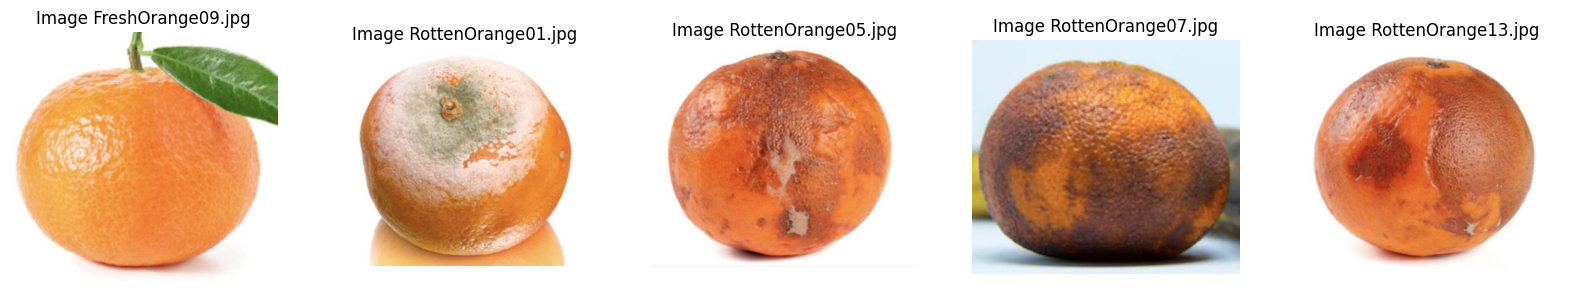

================================================================================ - Finish: ShowRandomImage


In [27]:
FileNameList, ImageList = ShowRandomImage(DatasetFiles, seedNo = 42)

# Segmentation on Specific Image by Hand Craft

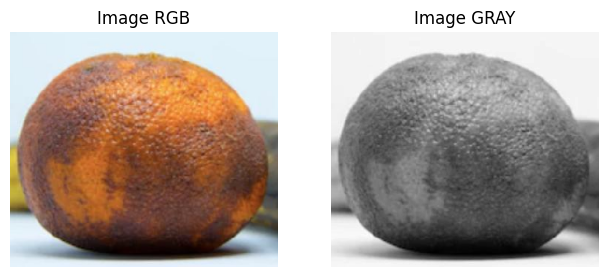

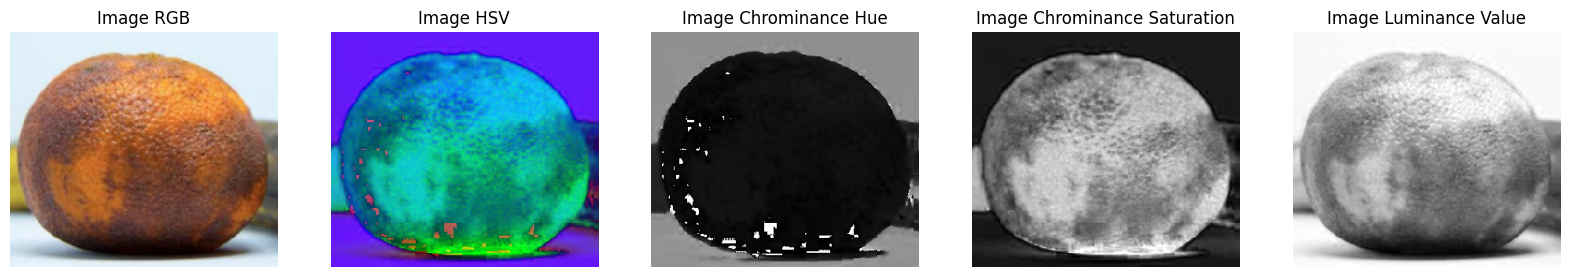

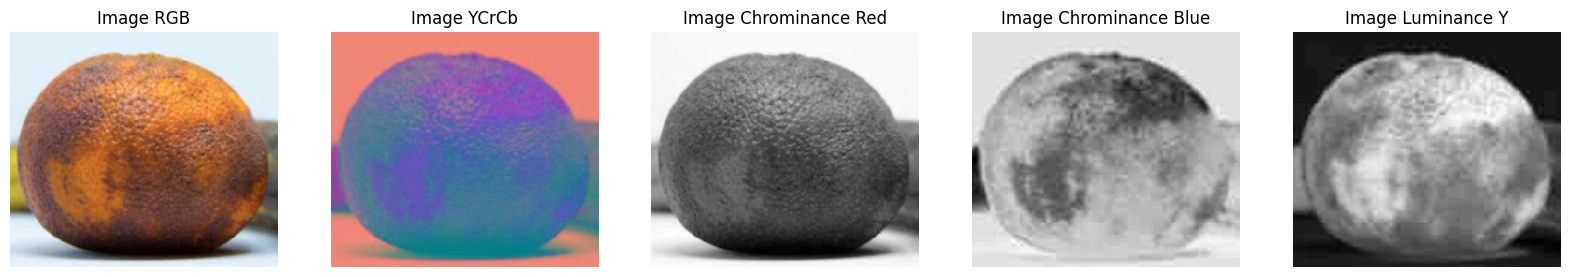

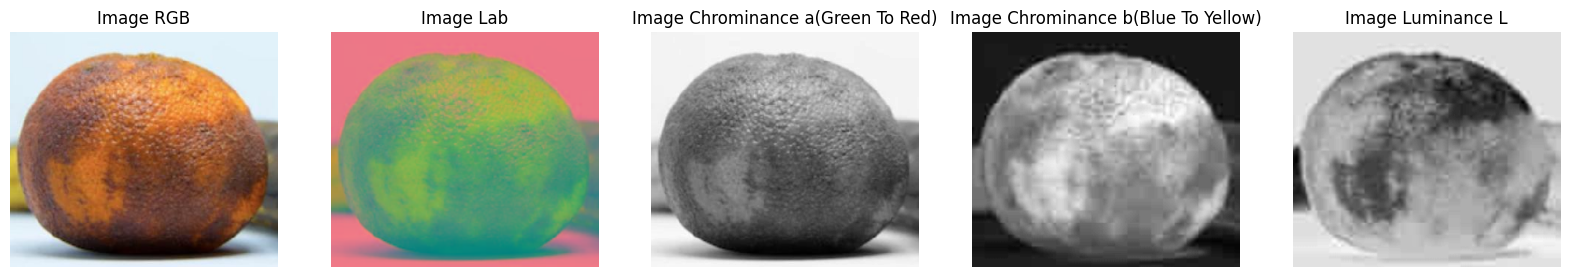

In [93]:
AnImage = ResizeImage(ImageList[3], 0, 300)
image_gray = ConvertColorSpaces(AnImage, ColorSpace = "GRAY")
image_hsv = ConvertColorSpaces(AnImage, ColorSpace = "HSV")
image_ycrcb = ConvertColorSpaces(AnImage, ColorSpace = "YCrCb")
image_lab = ConvertColorSpaces(AnImage, ColorSpace = "Lab")

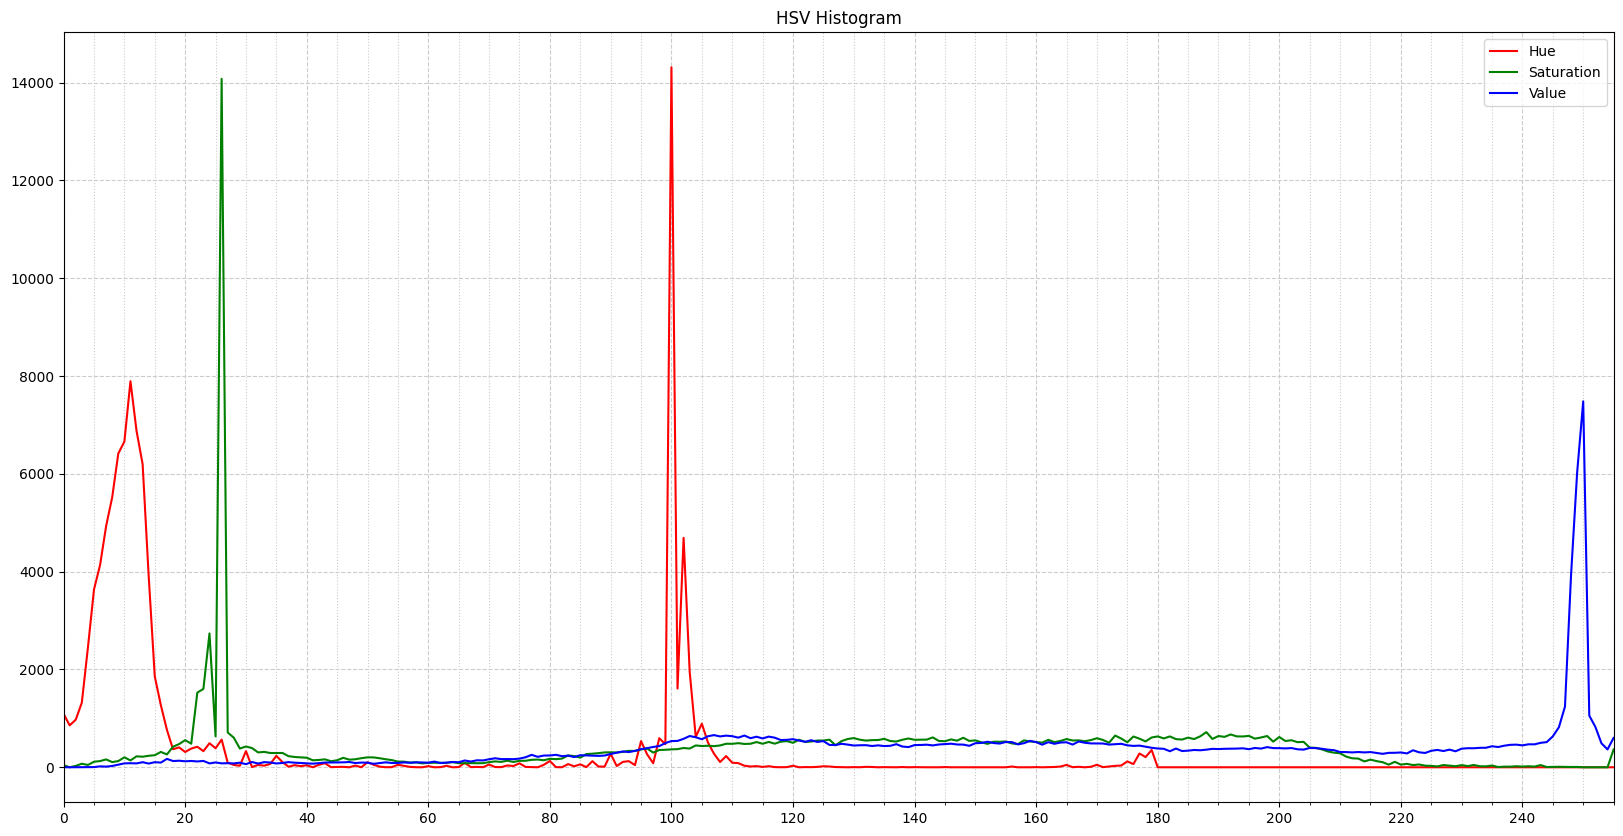

In [94]:
ShowHistogram(image_hsv, Title = "HSV Histogram", ChannelList = ["Hue", "Saturation", "Value"])

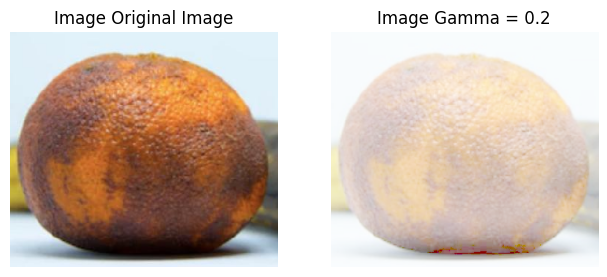

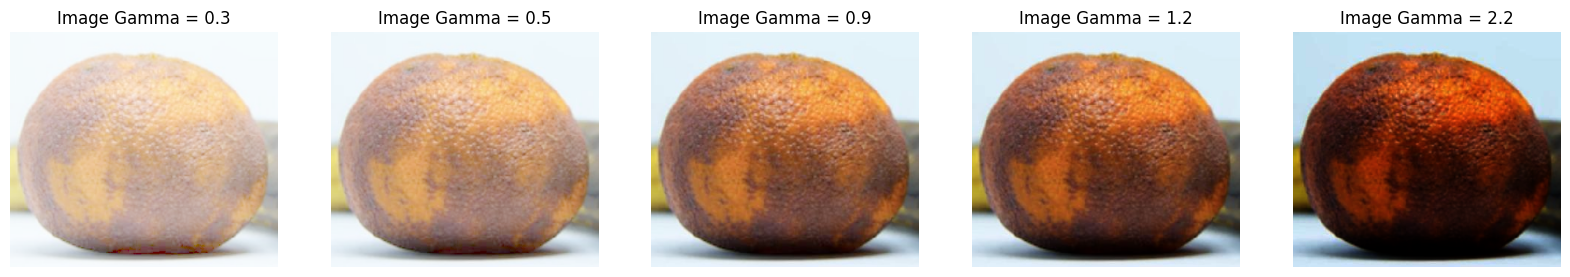

In [95]:
AnImage_Gamma = IntensityTransformation(AnImage, gamma = 0.2, display = 1)

In [96]:
hue = image_hsv[:,:,0]
saturation = image_hsv[:,:,1]
value = image_hsv[:,:,2]

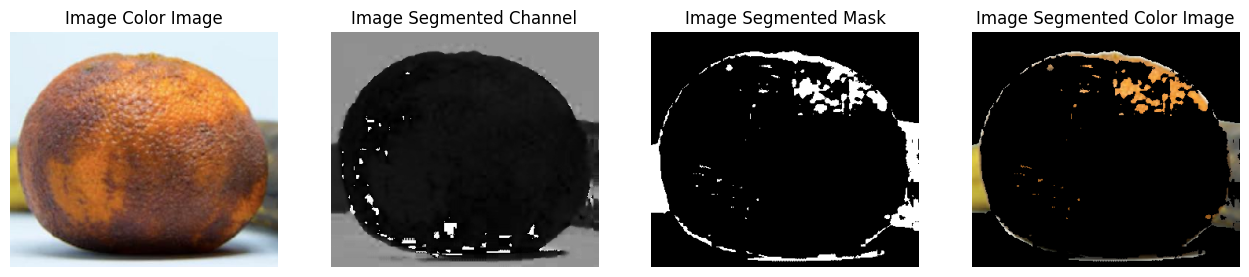

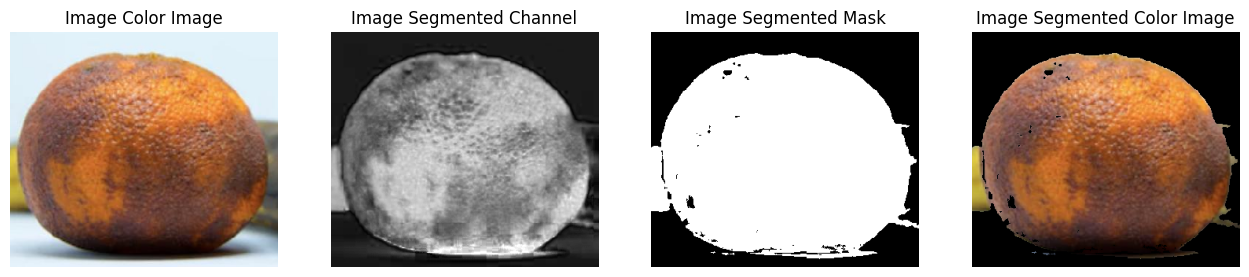

In [97]:
image_mask_bythresh1 = SegmentByThresh(AnImage, hue, segment_range = [14, 45])
image_mask_bythresh2 = SegmentByThresh(AnImage, saturation, segment_range = [70, 255])

Otsu Threshold : 57.0


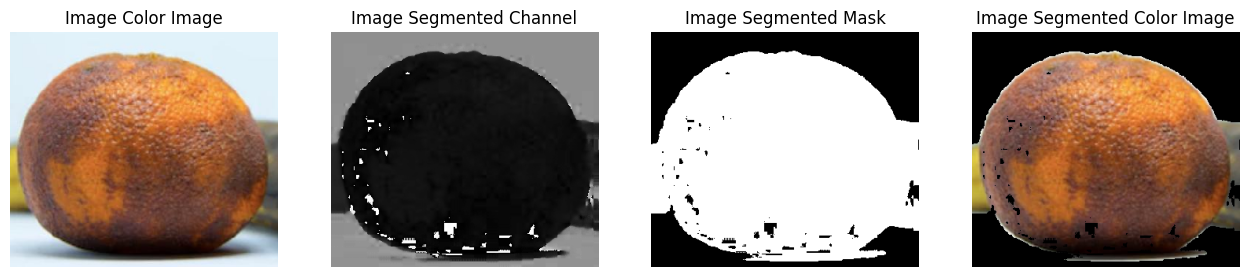

Otsu Threshold : 97.0


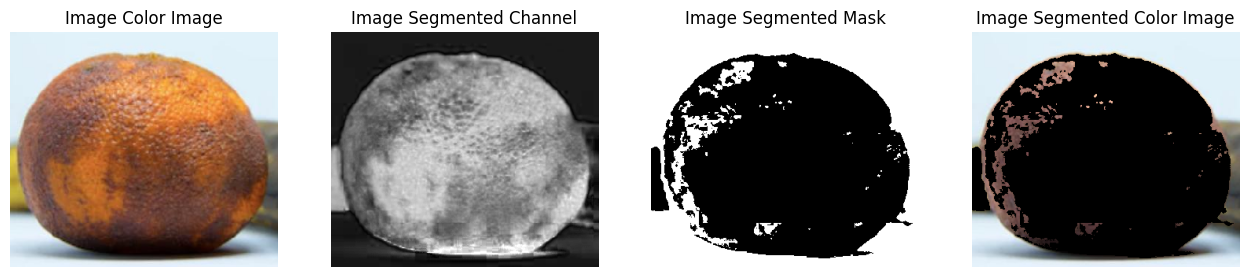

In [98]:
image_mask_byauto1 = SegmentByThresh(AnImage, image_hsv[:,:,0])
image_mask_byauto2 = SegmentByThresh(AnImage, image_hsv[:,:,1])

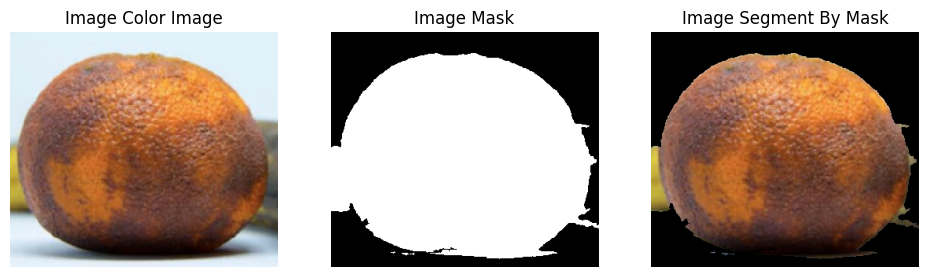

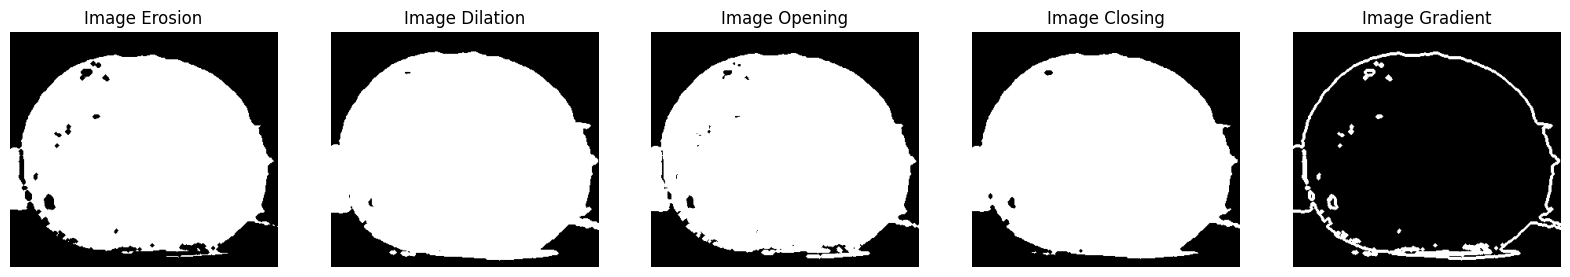

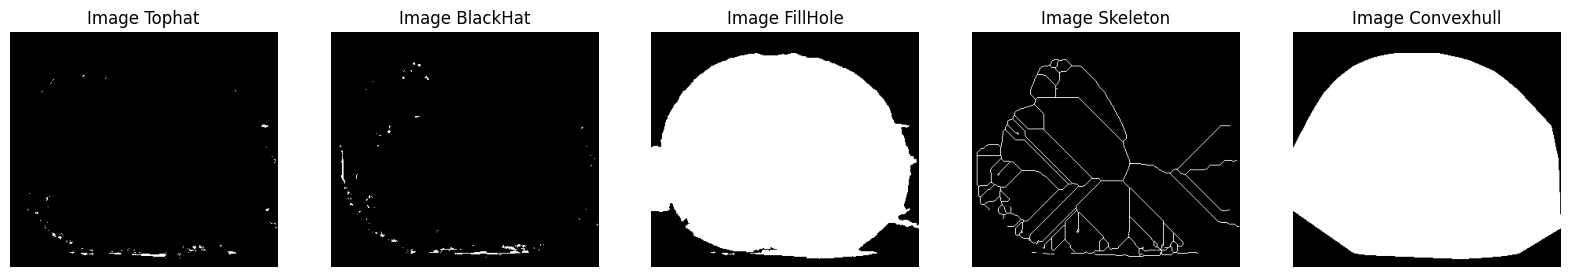

In [99]:
image_mask_bythresh = image_mask_bythresh2.copy()
image_mask_adjust = Morphology(AnImage, image_mask_bythresh, morType = "fillhole", size = 2, display = 1)

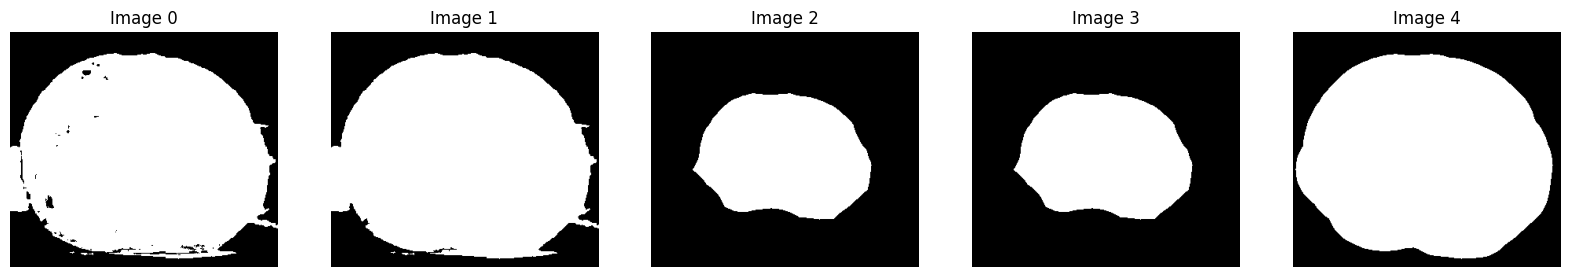

In [100]:
image_mask_adjust = doCoconutMaskSegment2(AnImage, image_mask_bythresh, display = 1)

Already Save Results to Folder Coconuts (Output)
Coconuts (Output)/FreshOrange09_rgbmask.jpg
Coconuts (Output)/FreshOrange09_demo.jpg


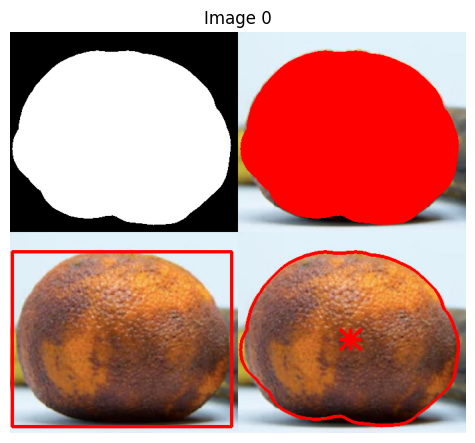

In [101]:
image_mask = image_mask_adjust.copy()
result = GenerateOutput(AnImage, image_mask, FilePath = FileNameList[0], SaveFolderPath = "Coconuts (Output)")
(image_output_rgbmask, image_output_fill, image_output_bbox, image_output_boundary, DemoImage) = result

ShowImage([DemoImage], 1, 3)

In [102]:
!mkdir "Orange (Output)"

In [ ]:
! pip install kaggle

In [40]:
import shutil
import os
from google.colab import files,drive

drive.mount('/content/drive/')
os.makedirs('/content/drive/MyDrive/colab/kaggle', exist_ok=True)
FolderPath = "/content/drive/MyDrive/colab/kaggle"
os.chdir(FolderPath)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [41]:
# Tải lên tệp kaggle.json từ máy tính
uploaded = files.upload()
print(uploaded)

Saving kaggle.json to kaggle.json
{'kaggle.json': b'{"username":"nguyendinhquangdinh","key":"e534da40ffdf2db2fb5a27719c803bf6"}'}


In [42]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [43]:
! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.57G/3.58G [01:00<00:00, 90.2MB/s]
100% 3.58G/3.58G [01:01<00:00, 63.0MB/s]


In [44]:
os.listdir()

['kaggle.json', 'fruits-fresh-and-rotten-for-classification.zip']

In [ ]:
!unzip 'fruits-fresh-and-rotten-for-classification.zip'

In [58]:
# Define paths
path = '/content/drive/MyDrive/Colab Notebooks/kaggle/dataset/'
input_train_dir = path + 'dataset/train'  # Path to original training data
output_train_dir = path + 'dataset/working/training'
input_test_dir = path + 'dataset/test'
output_test_dir= path + 'dataset/working/test'

# Copy the entire dataset to a location where you have write permissions
shutil.copytree(input_train_dir, output_train_dir)
shutil.copytree(input_test_dir, output_test_dir)

'/content/drive/MyDrive/Colab Notebooks/kaggle/dataset/dataset/working/test'

In [74]:
output_val_dir = path + 'dataset/working/validation'  # Path to working directory for training data
classes = ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']  # List of class names
os.makedirs(output_val_dir, exist_ok=True)

# Define the percentage of data to move to validation
validation_percentage = 0.1

In [75]:
# Iterate over each class folder
import random
for class_name in classes:
    class_path = os.path.join(output_train_dir, class_name)
    output_class_path = os.path.join(output_val_dir, class_name)
    os.makedirs(output_class_path, exist_ok=True)

    # List all files in the class folder
    files = os.listdir(class_path)

    # Calculate the number of files to move to validation
    num_validation_files = int(len(files) * validation_percentage)

    # Randomly select files for validation
    validation_files = random.sample(files, num_validation_files)

    # Move selected files to validation list
    for file in validation_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(output_class_path, file)
        shutil.move(src, dst)
print("Validation set created successfully.")

Validation set created successfully.


# Import more librabries

In [76]:
import torch
import torchvision
from torchvision.datasets import ImageFolder
from shutil import rmtree
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pathlib
from torch.utils.data import DataLoader
import glob
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from torchvision import models
from torchvision.models import resnet18
from tqdm import tqdm
import os, warnings, cv2
from os.path import isfile, join

# Check GPU is available

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cuda


# Accesing the Dataset Directories

In [77]:
train_path=path + 'dataset/working/training'
test_path=path + 'dataset/working/test'
val_path=path + 'dataset/working/validation'

In [78]:
transform = transforms.Compose(
    [transforms.Resize((128,128)),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [79]:
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)

['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


In [80]:
train_count=len(glob.glob(train_path+'/**/*.png'))
test_count=len(glob.glob(test_path+'/**/*.png'))
val_count=len(glob.glob(val_path+'/**/*.png'))
print(train_count,test_count,val_count)

9538 2698 1363


# Creating DataLoaders

In [81]:
batch_size = 16

In [82]:
train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transform),
    batch_size=batch_size, shuffle=True
)

val_loader=DataLoader(
    torchvision.datasets.ImageFolder(val_path,transform=transform),
    batch_size=batch_size, shuffle=True
)

test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transform),
    batch_size=batch_size, shuffle=True
)

In [ ]:
model = models.resnet18(pretrained=True)
model.eval()

In [84]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [85]:
num_epochs = 25

In [ ]:
device = torch.device('cuda')  # specify the device (GPU)
model.to(device)

Training Started
Epoch 1/25


Epoch 1/25 - Training: 100%|██████████| 597/597 [02:01<00:00,  4.93it/s, loss=6.31, accuracy=88.3]


Train Accuracy: 88.33%


Epoch 1/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.66it/s, loss=6.31, accuracy=88.8]


Validation Accuracy: 88.77%
Epoch 2/25


Epoch 2/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.47it/s, loss=1.24, accuracy=94.2]


Train Accuracy: 94.18%


Epoch 2/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.70it/s, loss=1.24, accuracy=93.5]


Validation Accuracy: 93.47%
Epoch 3/25


Epoch 3/25 - Training: 100%|██████████| 597/597 [01:50<00:00,  5.40it/s, loss=0.473, accuracy=95.3]


Train Accuracy: 95.29%


Epoch 3/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.75it/s, loss=0.473, accuracy=96.8]


Validation Accuracy: 96.77%
Epoch 4/25


Epoch 4/25 - Training: 100%|██████████| 597/597 [01:52<00:00,  5.31it/s, loss=0.0139, accuracy=96.1]


Train Accuracy: 96.10%


Epoch 4/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.76it/s, loss=0.0139, accuracy=95.7]


Validation Accuracy: 95.67%
Epoch 5/25


Epoch 5/25 - Training: 100%|██████████| 597/597 [01:48<00:00,  5.49it/s, loss=3.01, accuracy=96.5]


Train Accuracy: 96.49%


Epoch 5/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.74it/s, loss=3.01, accuracy=94.9]


Validation Accuracy: 94.86%
Epoch 6/25


Epoch 6/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.44it/s, loss=0.0513, accuracy=96.8]


Train Accuracy: 96.78%


Epoch 6/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.71it/s, loss=0.0513, accuracy=97.5]


Validation Accuracy: 97.51%
Epoch 7/25


Epoch 7/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.46it/s, loss=0.0477, accuracy=97]


Train Accuracy: 97.00%


Epoch 7/25 - Validation: 100%|██████████| 86/86 [00:13<00:00,  6.20it/s, loss=0.0477, accuracy=96]


Validation Accuracy: 95.96%
Epoch 8/25


Epoch 8/25 - Training: 100%|██████████| 597/597 [01:50<00:00,  5.38it/s, loss=0.0984, accuracy=97.8]


Train Accuracy: 97.81%


Epoch 8/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.68it/s, loss=0.0984, accuracy=98.8]


Validation Accuracy: 98.75%
Epoch 9/25


Epoch 9/25 - Training: 100%|██████████| 597/597 [01:51<00:00,  5.37it/s, loss=2.63, accuracy=97.4]


Train Accuracy: 97.40%


Epoch 9/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.62it/s, loss=2.63, accuracy=97.4]


Validation Accuracy: 97.43%
Epoch 10/25


Epoch 10/25 - Training: 100%|██████████| 597/597 [01:48<00:00,  5.51it/s, loss=0.0685, accuracy=97]


Train Accuracy: 96.96%


Epoch 10/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.71it/s, loss=0.0685, accuracy=98.9]


Validation Accuracy: 98.90%
Epoch 11/25


Epoch 11/25 - Training: 100%|██████████| 597/597 [01:50<00:00,  5.42it/s, loss=0.0352, accuracy=97.8]


Train Accuracy: 97.83%


Epoch 11/25 - Validation: 100%|██████████| 86/86 [00:13<00:00,  6.61it/s, loss=0.0352, accuracy=99]


Validation Accuracy: 98.97%
Epoch 12/25


Epoch 12/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.44it/s, loss=0.0161, accuracy=98]


Train Accuracy: 98.02%


Epoch 12/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.76it/s, loss=0.0161, accuracy=97.8]


Validation Accuracy: 97.80%
Epoch 13/25


Epoch 13/25 - Training: 100%|██████████| 597/597 [01:50<00:00,  5.40it/s, loss=2.71, accuracy=98]


Train Accuracy: 98.05%


Epoch 13/25 - Validation: 100%|██████████| 86/86 [00:13<00:00,  6.52it/s, loss=2.71, accuracy=98.9]


Validation Accuracy: 98.90%
Epoch 14/25


Epoch 14/25 - Training: 100%|██████████| 597/597 [01:54<00:00,  5.20it/s, loss=9.54, accuracy=97.8]


Train Accuracy: 97.84%


Epoch 14/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.67it/s, loss=9.54, accuracy=97.3]


Validation Accuracy: 97.29%
Epoch 15/25


Epoch 15/25 - Training: 100%|██████████| 597/597 [01:50<00:00,  5.39it/s, loss=0.0691, accuracy=97.5]


Train Accuracy: 97.54%


Epoch 15/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.67it/s, loss=0.0691, accuracy=99.2]


Validation Accuracy: 99.19%
Epoch 16/25


Epoch 16/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.44it/s, loss=1.72, accuracy=98.8]


Train Accuracy: 98.84%


Epoch 16/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.71it/s, loss=1.72, accuracy=99]


Validation Accuracy: 98.97%
Epoch 17/25


Epoch 17/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.45it/s, loss=0.318, accuracy=97.9]


Train Accuracy: 97.91%


Epoch 17/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.63it/s, loss=0.318, accuracy=95.7]


Validation Accuracy: 95.67%
Epoch 18/25


Epoch 18/25 - Training: 100%|██████████| 597/597 [01:48<00:00,  5.48it/s, loss=8.22, accuracy=98.7]


Train Accuracy: 98.72%


Epoch 18/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.69it/s, loss=8.22, accuracy=97.2]


Validation Accuracy: 97.21%
Epoch 19/25


Epoch 19/25 - Training: 100%|██████████| 597/597 [01:50<00:00,  5.40it/s, loss=0.0966, accuracy=98.5]


Train Accuracy: 98.48%


Epoch 19/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.70it/s, loss=0.0966, accuracy=99.1]


Validation Accuracy: 99.12%
Epoch 20/25


Epoch 20/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.45it/s, loss=0.341, accuracy=98.4]


Train Accuracy: 98.35%


Epoch 20/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.74it/s, loss=0.341, accuracy=98.7]


Validation Accuracy: 98.68%
Epoch 21/25


Epoch 21/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.48it/s, loss=5.27, accuracy=98.5]


Train Accuracy: 98.50%


Epoch 21/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.77it/s, loss=5.27, accuracy=96.3]


Validation Accuracy: 96.33%
Epoch 22/25


Epoch 22/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.44it/s, loss=0.0119, accuracy=99]


Train Accuracy: 98.99%


Epoch 22/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.86it/s, loss=0.0119, accuracy=98.8]


Validation Accuracy: 98.83%
Epoch 23/25


Epoch 23/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.47it/s, loss=0.0726, accuracy=98.8]


Train Accuracy: 98.84%


Epoch 23/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.66it/s, loss=0.0726, accuracy=98.4]


Validation Accuracy: 98.39%
Epoch 24/25


Epoch 24/25 - Training: 100%|██████████| 597/597 [01:49<00:00,  5.46it/s, loss=3.95, accuracy=98.6]


Train Accuracy: 98.58%


Epoch 24/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.66it/s, loss=3.95, accuracy=99]


Validation Accuracy: 99.05%
Epoch 25/25


Epoch 25/25 - Training: 100%|██████████| 597/597 [01:50<00:00,  5.41it/s, loss=1.24, accuracy=98.9]


Train Accuracy: 98.86%


Epoch 25/25 - Validation: 100%|██████████| 86/86 [00:12<00:00,  6.70it/s, loss=1.24, accuracy=98.3]


Validation Accuracy: 98.31%
Finished Training


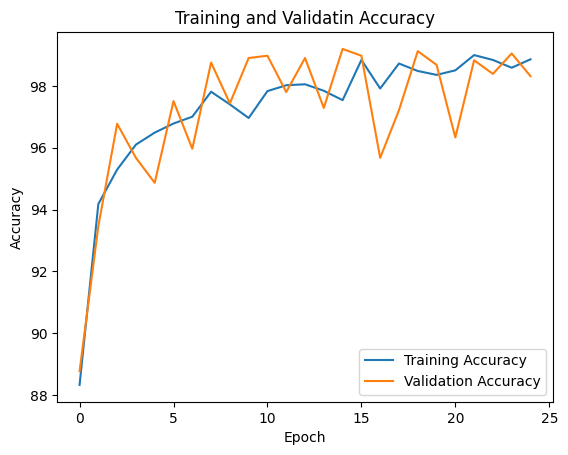

In [87]:
train_acc_list = []
val_acc_list = []

print("Training Started")

for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    print(f"Epoch {epoch+1}/{num_epochs}")
    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training")
    for i, data in enumerate(train_bar, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # move inputs and labels to the GPU

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        # Track training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        train_bar.set_postfix({'loss': loss.item(), 'accuracy': 100 * correct / total})

        running_loss += loss.item()
        if i % 10000 == 9999:    # print every 10,000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10000))
            running_loss = 0.0

    # Print training accuracy
    train_acc = 100 * correct / total
    print(f"Train Accuracy: {train_acc:.2f}%")
    train_acc_list.append(train_acc)

    # Evaluate on Validation set
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation")
        for data in val_bar:

            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # move inputs and labels to the GPU

            outputs = model(inputs)
            val_loss += loss_function(outputs, labels).item()

            # Track Validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            val_bar.set_postfix({'loss': loss.item(), 'accuracy': 100 * val_correct / val_total})

    # Print Val accuracy
    val_acc = 100 * val_correct / val_total
    print(f"Validation Accuracy: {val_acc:.2f}%")
    val_acc_list.append(val_acc)

print('Finished Training')

# Plot the final training and validaton accuracy
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validatin Accuracy')
plt.legend()
plt.show()

In [88]:
# Save the trained model
torch.save(model.state_dict(), 'resnet18fruit_V001.pth')

# Accuracy on Testing Set

In [89]:
train_accuracy = train_acc_list

# Get the overall accuracy (final accuracy after training)
overall_train_accuracy = train_accuracy[-1]

# Print the overall accuracy
print(f"Overall Training Accuracy: {overall_train_accuracy:.4f}")

Overall Training Accuracy: 98.8572


In [90]:
model.eval()
test_total = []
test_pred = []

with torch.no_grad():

    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_total.extend(labels.cpu().numpy())
        test_pred.extend(predicted.cpu().numpy())

# Calculate the F1 score
f1 = f1_score(test_total, test_pred, average='weighted')
print(f'F1 score: {f1:.4f}')

# Calculate the confusion matrix
cm = confusion_matrix(test_total, test_pred)
print('Confusion matrix:')
print(cm)

F1 score: 0.9918
Confusion matrix:
[[394   0   0   1   0   0]
 [  0 380   0   1   0   0]
 [  0   0 378   3   0   7]
 [  2   0   0 595   2   2]
 [  0   0   0   0 530   0]
 [  0   0   1   2   1 399]]


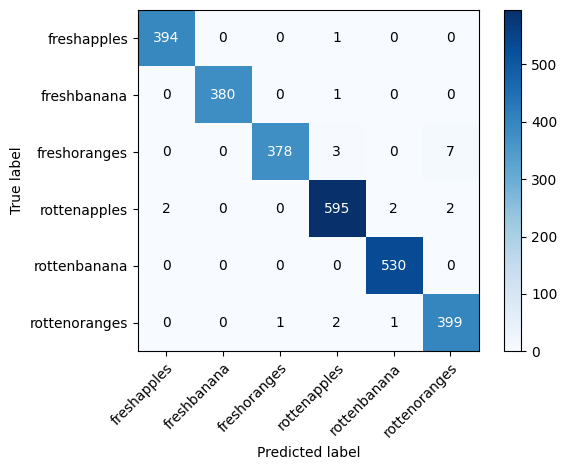

In [91]:
# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()